Assumptions -> [Campusx](https://www.youtube.com/watch?v=EmSNAtcHLm8)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import  LinearRegression

# Assumption of Linear Regression

1. Linear Relationship
2. Multicolinearity
3. Normal Residual
4. Homoscedasticity
5. No Autocorrelation of Error

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/linear-regression-assumptions/refs/heads/main/data.csv")
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [8]:
X = df.drop("target",axis=1)
y = df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
residual = y_test - y_pred

### Linear Relationship between Input and Output

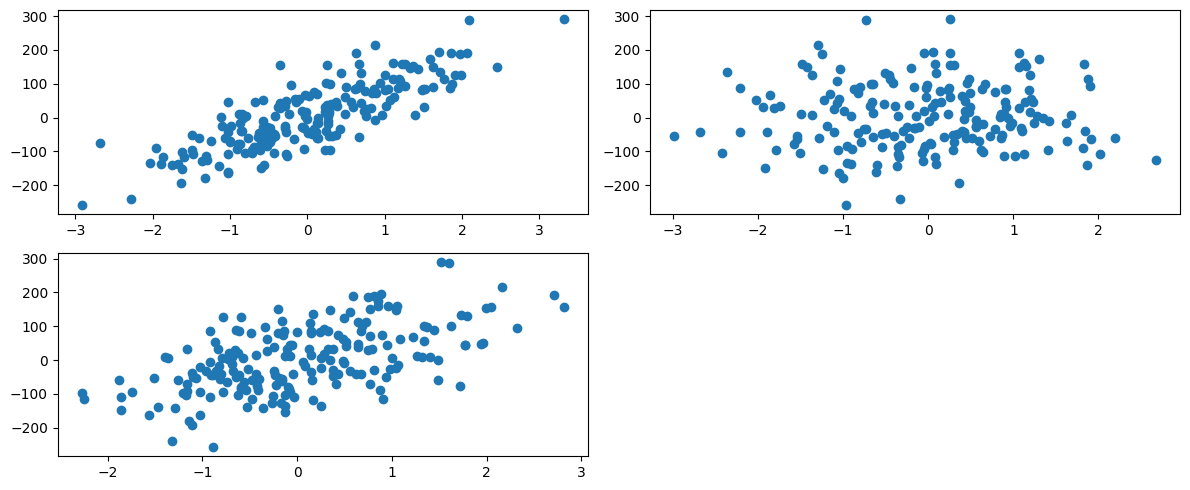

In [13]:
plt.figure(figsize=(12,5))

plt.subplot(2,2,1)
plt.scatter(df["feature1"],df["target"])

plt.subplot(2,2,2)
plt.scatter(df["feature2"],df["target"])

plt.subplot(2,2,3)
plt.scatter(df["feature3"],df["target"])

plt.tight_layout()
plt.show()

### Multicolinearity

Link - [DataCamp Link](https://www.datacamp.com/tutorial/variance-inflation-factor)

The variance inflation factor formula
The VIF for a predictor X is calculated as: 

Variance inflation factor (VIF) formula

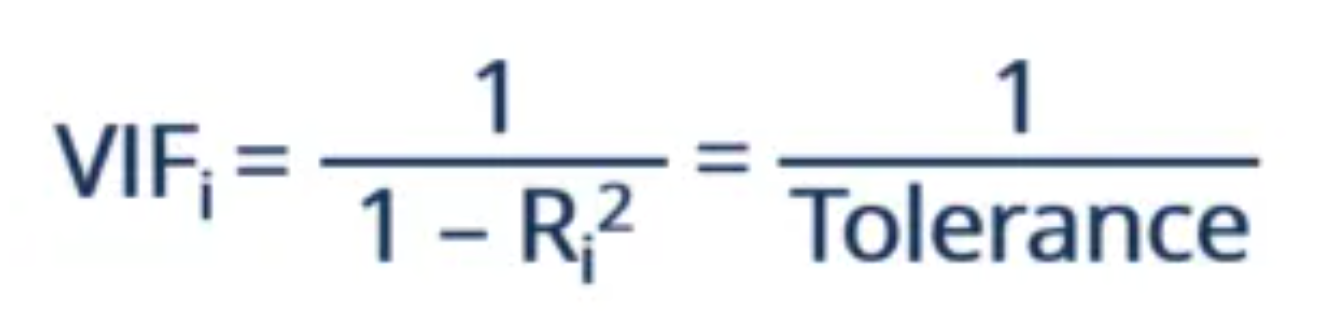
Where:

R2 is the coefficient of determination obtained when X​ is regressed on all other predictors.
Step-by-step calculation

Finding VIF is a three-step process. The first step is to fit a separate linear regression model for each predictor against all other predictors. The second step is to obtain the R2 value for each model. The final step is to calculate VIF using the formula above.

Interpretation of VIF Values
Here’s how to interpret VIF values to understand the level of multicollinearity:

1. VIF = 1: This indicates no multicollinearity. The predictor is not correlated with other predictors, so it doesn’t inflate the standard error or affect the model’s stability.

2. VIF between 1 and 5: This suggests moderate multicollinearity. There’s some correlation with other predictors, but it’s usually not severe. However, it’s worth keeping an eye on these predictors to see if multicollinearity becomes a problem, especially if other VIF values are high.

3. VIF > 5: High multicollinearity is present. The predictor’s standard error may be noticeably inflated, which can make its coefficient less reliable. Consider taking steps to reduce multicollinearity, like removing or combining correlated predictors.

4. VIF > 10: This signals serious multicollinearity. The predictor’s standard error is highly inflated, and its coefficient estimate is likely unstable. Corrective actions, such as removing the predictor or using regularization techniques, are usually needed.

For instance, if a predictor’s VIF is 10, it indicates that the variance of that predictor’s coefficient is 10 times what it would be if there were no multicollinearity. 

In [14]:
from statsmodels.stats.outliers_influence import  variance_inflation_factor

vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train,i))

In [15]:
vif

[np.float64(1.0019497109290072),
 np.float64(1.0112734765863598),
 np.float64(1.0112111183384132)]

In [16]:
pd.DataFrame({'vif': vif},index=df.columns[0:3])

,vif
feature1,1.001950
feature2,1.011273
feature3,1.011211


or we can plot correlation

<Axes: >

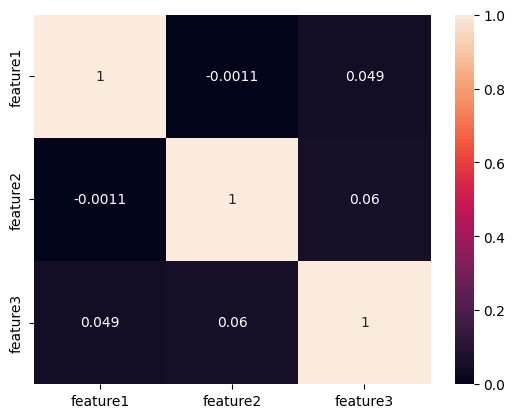

In [17]:
sns.heatmap(df.iloc[:,:3].corr(),annot=True)

### Normal Residual

error should be normally distributed

<Axes: xlabel='target', ylabel='Density'>

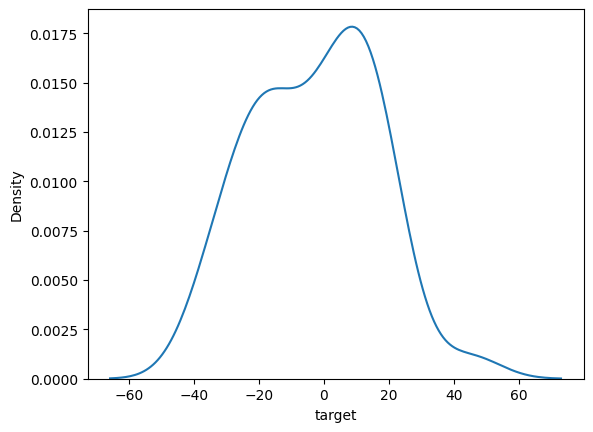

In [18]:
sns.kdeplot(residual)

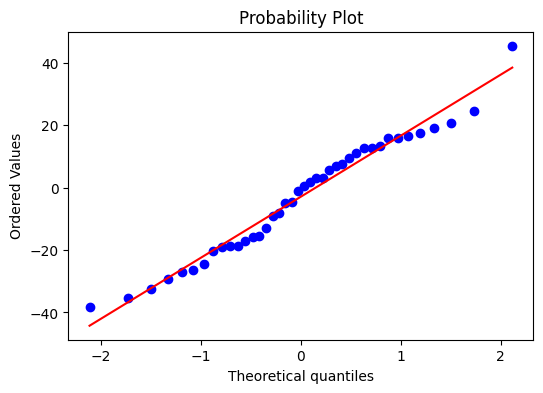

In [21]:
from scipy.stats import probplot

fig,ax = plt.subplots(figsize=(6,4))
probplot(residual,plot=ax,fit=True)
plt.show()

### Homoscedasticity

Homo - Same
scdeasticity - spread or scatter

means having same scatter.

Means when we plot the residuals the spread should be equal and if not its heteroscdeasticity.

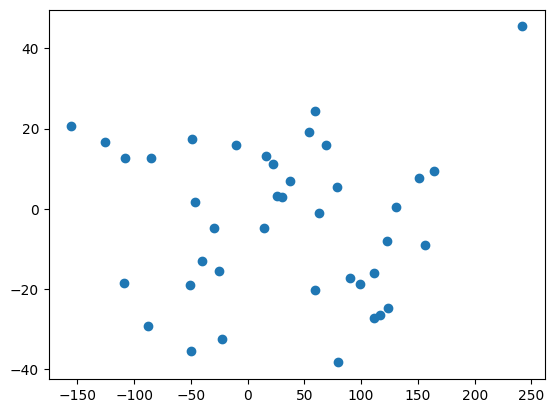

In [24]:
plt.scatter(y_pred,residual)

### No Autocorrelation

no relationship between residuals

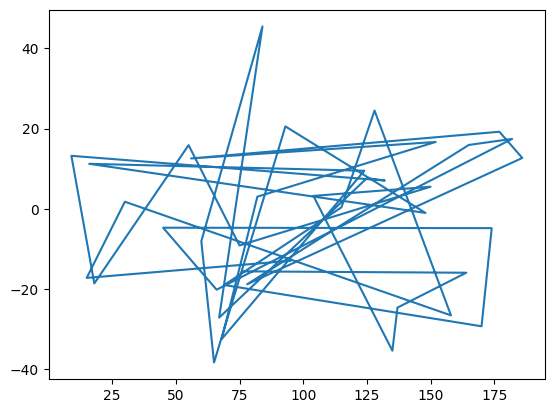

In [25]:
plt.plot(residual)